# Income prediction on census data

# Objective: 
To predict whether income exceeds 50K/yr based on census data

Dataset: Adult Data Set

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data


Variable description:
    
age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

In [1]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np

In [20]:
# For preprocessing the data
from sklearn.impute import SimpleImputer
from sklearn import preprocessing

In [3]:
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

In [4]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

In [5]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

In [9]:
adult_df = pd.read_csv('/kaggle/input/adultdatasetxai/Adult Data.csv', header = None, delimiter=' *, *', engine='python')

Load the dataset. Observe that this file has .data extention

For importing the census data, we are using pandas read_csv() method. This method is a very simple and fast method for importing 
data.

We are passing four parameters. The ‘adult.data’ parameter is the file name. The header parameter is for giving details to pandas
that whether the first row of data consists of headers or not. In our dataset, there is no header. So, we are passing None.

The delimiter parameter is for giving the information the delimiter that is separating the data. Here, we are using ‘ , ’ 
delimiter. This delimiter is to show delete the spaces before and after the data values. This is very helpful when there is 
inconsistency in spaces used with data values.

In [10]:
# Print columns in the adult data set
adult_df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [11]:
# Adding headers to the dataframe 
adult_df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
                    'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [12]:
# Number of records(rows) in the dataframe
len(adult_df)

32561

In [13]:
# Handling missing data
# Test whether there is any null value in our dataset or not. We can do this using isnull() method.
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

The above output shows that there is no “null” value in our dataset.

Let’s try to test whether any categorical attribute contains a “?” in it or not. At times there exists “?” or ” ” in place of 
missing values. Using the below code snippet we are going to test whether adult_df data frame consists of categorical variables 
with values as “?”.

In [14]:
for value in ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']:
    print(value,":", sum(adult_df[value] == '?'))

workclass : 1836
education : 0
marital_status : 0
occupation : 1843
relationship : 0
race : 0
sex : 0
native_country : 583
income : 0


The output of the above code snippet shows that there are 1836 missing values in workclass attribute. 1843 missing values in 
occupation attribute and 583 values in native_country attribute.

# Data preprocessing

For preprocessing, we are going to make a duplicate copy of our original dataframe.We are duplicating adult_df to adult_df_rev 
dataframe. Observe that we have used deep copy while copying. Why?

In [15]:
## Deep copy of adult_df
adult_df_rev = adult_df.copy(deep=True)

Before doing missing values handling task, we need some summary statistics of our dataframe. For this, we can use describe() 
method. It can be used to generate various summary statistics, excluding NaN values.

In [16]:
adult_df_rev.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We are passing an “include” parameter with value as “all”, this is used to specify that. we want summary statistics of all the 
attributes.

In [17]:
adult_df_rev.describe(include= 'all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Data imputation 

Some of the categorical values have missing values i.e, “?”. We replace the “?” with the above describe methods top row’s value. 
For example, we replace the “?” values of workplace attribute with “Private” value.

In [18]:
for value in ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','income']:
    #adult_df_rev[value].replace(['?'], [adult_df_rev.describe(include='all')[value][2]],inplace='True')
    replaceValue = adult_df_rev.describe(include='all')[value][2]
    adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue

/tmp/ipykernel_32/4115652718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue
/tmp/ipykernel_32/4115652718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue
/tmp/ipykernel_32/4115652718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df_rev[value][adult_df_rev[value]=='?'] = replaceValue
/tmp/ipykerne

For Naive Bayes, we need to convert all the data values in one format.

We are going to encode all the labels with the value between 0 and n_classes-1. In the present case, it will be 0 and 1.

For implementing this, we are going to use LabelEncoder of scikit learn library.

In [21]:
# Hot Encoding 
le = preprocessing.LabelEncoder()
workclass_cat = le.fit_transform(adult_df.workclass)
education_cat = le.fit_transform(adult_df.education)
marital_cat   = le.fit_transform(adult_df.marital_status)
occupation_cat = le.fit_transform(adult_df.occupation)
relationship_cat = le.fit_transform(adult_df.relationship)
race_cat = le.fit_transform(adult_df.race)
sex_cat = le.fit_transform(adult_df.sex)
native_country_cat = le.fit_transform(adult_df.native_country)

In [22]:
#initialize the encoded categorical columns
adult_df_rev['workclass_cat'] = workclass_cat
adult_df_rev['education_cat'] = education_cat
adult_df_rev['marital_cat'] = marital_cat
adult_df_rev['occupation_cat'] = occupation_cat
adult_df_rev['relationship_cat'] = relationship_cat
adult_df_rev['race_cat'] = race_cat
adult_df_rev['sex_cat'] = sex_cat
adult_df_rev['native_country_cat'] = native_country_cat

In [23]:
adult_df_rev.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,native_country,income,workclass_cat,education_cat,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,native_country_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,United-States,<=50K,7,9,4,1,1,4,1,39
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,United-States,<=50K,6,9,2,4,0,4,1,39
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,United-States,<=50K,4,11,0,6,1,4,1,39
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,United-States,<=50K,4,1,2,6,0,2,1,39
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,Cuba,<=50K,4,9,2,10,5,2,0,5


In [24]:
#drop the old categorical columns from dataframe
dummy_fields = ['workclass','education','marital_status','occupation','relationship','race', 'sex', 'native_country']
adult_df_rev = adult_df_rev.drop(dummy_fields, axis = 1)

Reindex all the columns properly. We have passed the list of column names as a parameter and axis=1 for reindexing the columns.

In [25]:
adult_df_rev = adult_df_rev.reindex(['age', 'workclass_cat', 'fnlwgt', 'education_cat',
                                    'education_num', 'marital_cat', 'occupation_cat',
                                    'relationship_cat', 'race_cat', 'sex_cat', 'capital_gain',
                                    'capital_loss', 'hours_per_week', 'native_country_cat', 
                                    'income'], axis= 1)
adult_df_rev.head(5)

,age,workclass_cat,fnlwgt,education_cat,education_num,marital_cat,occupation_cat,relationship_cat,race_cat,sex_cat,capital_gain,capital_loss,hours_per_week,native_country_cat,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,<=50K
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,<=50K
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,<=50K


Now we have created multiple categorical columns like “marital_cat”, “race_cat” etc. !

<Axes: xlabel='income'>

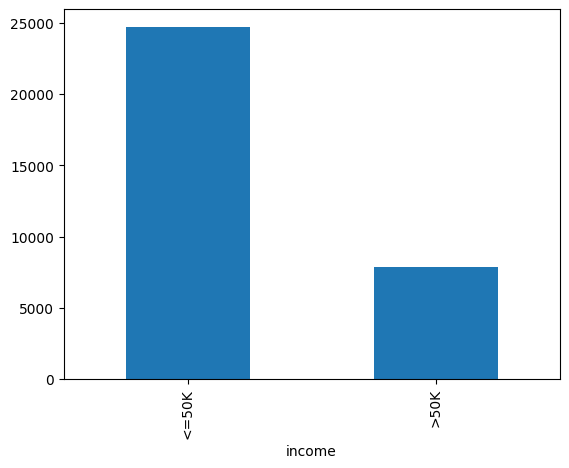

In [26]:
adult_df_rev['income'].value_counts().plot(kind='bar')

# Data Slicing

In [27]:
# Arrange data into independent variables and dependent variables
X = adult_df_rev.values[:,:14]  ## Features
Y = adult_df_rev.values[:,14]  ## Target

In [28]:
# Split the data into train and test
# Train data size: 70% of original data
# Test data size: 30% of original data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

Implement Gaussian Naive Bayes

In [29]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. 
After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its 
parameters.

In [30]:
Y_pred = clf.predict(X_test)

Accuracy of our Gaussian Naive Bayes model

In [31]:
accuracy_score(Y_test, Y_pred, normalize = True)

0.7925069096120381

### But is accuracy a good indicator of Classifier's performance?

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(Y_test, Y_pred)

array([[7013,  410],
       [1617,  729]])

In [34]:
Accuracy = (7013+729)/(7013+410+1617+729)

In [35]:
Accuracy

0.7925069096120381

In [36]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [37]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       <=50K       0.81      0.94      0.87      7423
        >50K       0.64      0.31      0.42      2346

    accuracy                           0.79      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.77      0.79      0.76      9769



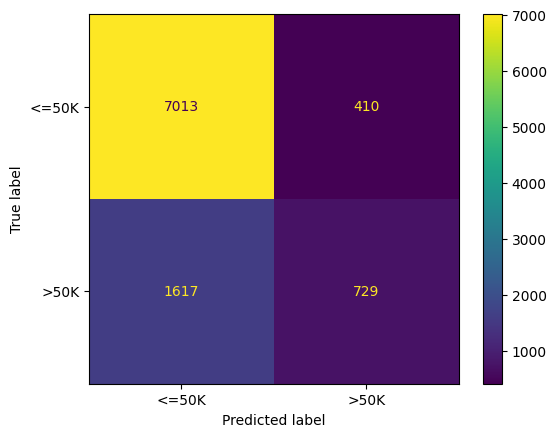

In [38]:
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()

## UPSAMPLING DOWNSAMPLING